# Movie Recommendation Predict Team 13 Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM 13**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<img alt="Movie recommendations" src="https://github.com/Explore-AI/unsupervised-predict-streamlit-template/raw/master/resources/imgs/Image_header.png">

### Predict Overview: Movie Recommendation

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

With this in mind **Team 13** is tasked to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Comet Experiment</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Data Engineering</a>

<a href=#seven>7. Modeling and Model Performance</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>
### Movie Recommendation
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Problem statement:



Task:


Our App () will provide an accurate and robust solutions, giving companies access to allow individuals the ability to watch similar movies based on thier past preferences or viewing list.

<a id="two"></a>
## 2. Comet Experiment
<a href=#cont>Back to Table of Contents</a>

Below is a cell to capture our experiement and post our progress on the version control platform, Comet.

In [17]:
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="0WPX5QrkfJHeQjc6pbEbzT9fz",
    project_name="general",
    workspace="oladotun-jonibola",)

ModuleNotFoundError: No module named 'comet_ml'

<a id="three"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
from datetime import datetime
import re
import preprocessor as p


from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists


import warnings
warnings.filterwarnings('ignore')

<a id="four"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load all the require data into different DataFrame. |

---

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_tag=pd.read_csv('tags.csv')
df_movies=pd.read_csv('movies.csv')
df_links=pd.read_csv('links.csv')
df_imdb=pd.read_csv('imdb_data.csv')
df_genome_tags=pd.read_csv('genome_tags.csv')
df_genome_scores=pd.read_csv('genome_scores.csv')


In [3]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


**Observation:** 
1. There are 10000038 rows and 4 columns.
2. The data types consist of 3 interger and 1 float data type
3. The size of the data is 305.2 MB
4. The date is in timestamp, this would be converted to data time during feature engineering.

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Observation:** 
1. There are 62423 rows and 3 columns.
2. The data types consist of 1 interger and 2 object data type
3. The size of the data is 1.4+ MB
4. There are no null values.

In [7]:
df_tag.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [8]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [10]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [11]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [12]:
dt=df_train.isnull().sum(), df_genome_scores.isnull().sum(), df_movies.isnull().sum(), df_tag.isnull().sum(), df_links.isnull().sum(), df_imdb.isnull().sum(), df_genome_tags.isnull().sum()

In [13]:
dt

(userId       0
 movieId      0
 rating       0
 timestamp    0
 dtype: int64,
 movieId      0
 tagId        0
 relevance    0
 dtype: int64,
 movieId    0
 title      0
 genres     0
 dtype: int64,
 userId        0
 movieId       0
 tag          16
 timestamp     0
 dtype: int64,
 movieId      0
 imdbId       0
 tmdbId     107
 dtype: int64,
 movieId              0
 title_cast       10068
 director          9874
 runtime          12089
 budget           19372
 plot_keywords    11078
 dtype: int64,
 tagId    0
 tag      0
 dtype: int64)

**Observation:** The links has the tag column with **16** null values while the tags table with the tmdbId column has **107** missing values and imdb table has title_cast, director, runtime, budget and plot_keywords columns of **10,068**, **9,874**, **12,089**, **19,372**, **11,078** null values respectively.

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [15]:
xv=df_train['rating'].value_counts()

Text(0.5, 1.0, 'Rating Distribution')

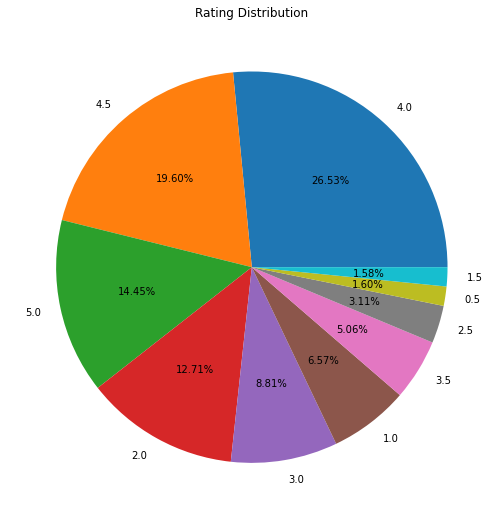

In [16]:
label=df_train['rating'].unique()
fig = plt.figure(figsize=(15,9));
plt.pie (xv,data=df_train, autopct='%1.2f%%',labels=label)
plt.show
plt.title ('Rating Distribution')

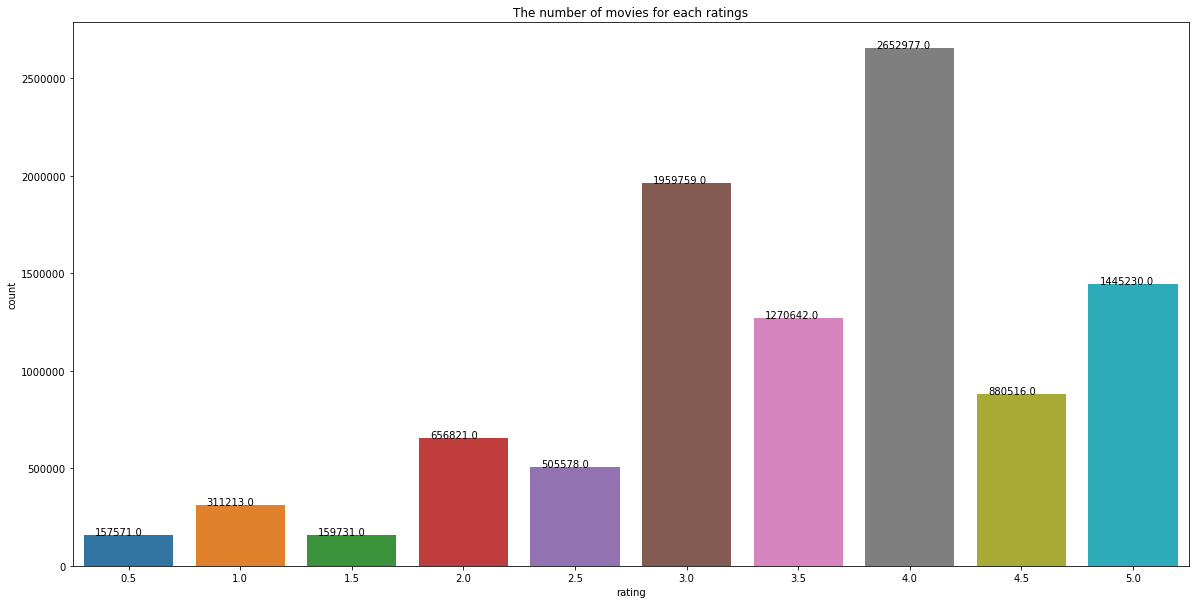

In [17]:

fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=df_train) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) # Set the tick labels to appear in non-scientific form

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

**Observations:** The two most common ratings are that of 4.0 and 3.0

In [18]:
new_data=pd.merge(df_train, df_movies, on='movieId', how='left')

In [19]:
new_data.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


In [20]:
new_data.duplicated().sum()

0

In [21]:
new_data.shape

(10000038, 6)

In [22]:
new_data['genres']=new_data['genres'].str.replace('|',' ')

In [23]:
new_data.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy Crime Drama Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action Comedy Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure Comedy Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama Horror Mystery Thriller


In [24]:
new_data2=pd.merge(df_tag, df_links, on='movieId')

In [25]:
new_data2.tag

0            classic
1             sci-fi
2             action
3          adventure
4            fantasy
             ...    
1093355        india
1093356       indian
1093357       comedy
1093358     disabled
1093359      robbery
Name: tag, Length: 1093360, dtype: object

In [26]:
new_data3=pd.merge(new_data, df_imdb, on='movieId')

In [27]:
new_data_n=pd.merge(new_data, df_imdb, on='movieId', how='left')

In [28]:
content_based_data=new_data_n.dropna(how='any')

In [29]:
new_data_n.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2971414
director         2969695
runtime          3020065
budget           3519283
plot_keywords    2977050
dtype: int64

In [30]:
content_based_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454993 entries, 0 to 10000036
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      int64  
 4   title          object 
 5   genres         object 
 6   title_cast     object 
 7   director       object 
 8   runtime        float64
 9   budget         object 
 10  plot_keywords  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 591.0+ MB


In [31]:
content_based_data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy Crime Drama Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action Comedy Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie|michael jackson character|shorthaired...
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure Comedy Crime,Sandra Bullock|Regina King|Enrique Murciano|Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama Horror Mystery Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger|elm street|famous director as h...


In [32]:
def convert_timestamp(x):
   
    dt_obj = datetime.fromtimestamp(x)
    return dt_obj

In [33]:
x=content_based_data['timestamp']

In [34]:
content_based_data['timestamp']=content_based_data['timestamp'].apply(lambda x: convert_timestamp(x))

In [35]:
content_based_data['userId_year']=content_based_data['timestamp'].dt.year

In [36]:
content_based_data['userId_month']=content_based_data['timestamp'].dt.month

In [37]:
content_based_data['userId_day']=content_based_data['timestamp'].dt.day

In [38]:
content_based_data['userId_hour']=content_based_data['timestamp'].dt.hour

In [39]:
content_based_data['movie length (hrs)']=round(content_based_data['runtime']/60, 2)

In [40]:
#We specify the parantheses so we don't conflict with movies that have years in their titles
content_based_data['movie_year'] = content_based_data.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
content_based_data['movie_year'] = content_based_data.movie_year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
content_based_data['title'] = content_based_data.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
content_based_data['title'] = content_based_data['title'].apply(lambda x: x.strip())

In [41]:
content_based_data['title_cast']=content_based_data['title_cast'].str.replace('|',' ')

In [42]:
content_based_data['plot_keywords']=content_based_data['plot_keywords'].str.replace('|',' ')

In [47]:
content_based_data.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,userId_year,userId_month,userId_day,userId_hour,movie length (hrs),movie_year,New_budget
0,5163,57669,4.0,2018-02-11 11:53:12,In Bruges,Comedy Crime Drama Thriller,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf bruges irish hitman,2018,2,11,11,1.78,2008,"$15,000,000"
1,106343,5,4.5,2008-03-23 02:18:59,Father of the Bride Part II,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion,2008,3,23,2,1.77,1995,"$30,000,000"


In [48]:
content_based_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Virginia's Run                                              5.0
Vasermil                                                    5.0
Single White Female 2: The Psycho                           5.0
TerrorStorm: A History of Government-Sponsored Terrorism    5.0
Tennessee                                                   5.0
Name: rating, dtype: float64

In [49]:
ratings = pd.DataFrame(content_based_data.groupby('title')['rating'].mean())
ratings

,rating
title,
'Salem's Lot,3.102941
'Til There Was You,2.837321
(500) Days of Summer,3.709107
.45,2.571429
1,2.562500
...,...
[REC]²,3.256024
[REC]³ 3 Génesis,2.453947
eXistenZ,3.361325


In [50]:
ratings['num of ratings'] = pd.DataFrame(content_based_data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Salem's Lot,3.102941,68
'Til There Was You,2.837321,209
(500) Days of Summer,3.709107,4524
.45,2.571429,7
1,2.562500,8


In [51]:
print('A total of ',df_train["userId"].nunique(), 'users have watched a total of',df_train.movieId.nunique(),'movies in the database/dataframe')

A total of  162541 users have watched a total of 48213 movies in the database/dataframe


In [52]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
user_rating_mean = pd.DataFrame(df_train.groupby('userId')['rating'].mean().reset_index())
user_rating_count = pd.DataFrame(df_train.groupby('userId')['rating'].count().reset_index())
# Merge the above to dataframe 
comb_user_rating = user_rating_mean.merge(user_rating_count,on='userId',how = 'left')
# Rename the columns respectively
comb_user_rating.rename(columns={'rating_x':'Avg_rating','rating_y':'Number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
comb_user_rating = comb_user_rating.sort_values('Avg_rating', ascending = False)

# Show 5 observations 
comb_user_rating.head()

,userId,Avg_rating,Number_of_movies
83902,83903,5.0,19
9631,9632,5.0,5
161714,161715,5.0,7
45507,45508,5.0,9
42156,42157,5.0,8


In [54]:
total_ratings = content_based_data.groupby(['movieId','genres']).mean()['rating'].reset_index()
total_ratings

,movieId,genres,rating
0,1,Adventure Animation Children Comedy Fantasy,3.889971
1,2,Adventure Children Fantasy,3.263414
2,3,Comedy Romance,3.132325
3,4,Comedy Drama Romance,2.878099
4,5,Comedy,3.059165
...,...,...,...
6413,131098,Animation Children Comedy,4.000000
6414,131138,Comedy Drama War,2.800000
6415,131176,Drama,3.312500
6416,131252,Comedy Horror,3.825000


In [66]:
user_pref=content_based_data.groupby('userId')['userId','title','movie_year']
user_pref.head()

,userId,title,movie_year
0,5163,In Bruges,2008
1,106343,Father of the Bride Part II,1995
2,146790,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),2002
3,106362,Miss Congeniality 2: Armed and Fabulous,2005
4,9041,Wes Craven's New Nightmare (Nightmare on Elm S...,1994
...,...,...,...
9999544,140370,Warriors of Heaven and Earth (Tian di ying xiong),2003
9999626,52437,Rat Race,2001
9999700,144845,How to Lose a Guy in 10 Days,2003
9999797,150169,Thor,2011


In [68]:
final_content_based_data=content_based_data[['title','genres','title_cast','plot_keywords']]

In [69]:
final_content_based_data.head()

,title,genres,title_cast,plot_keywords
0,In Bruges,Comedy Crime Drama Thriller,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,dwarf bruges irish hitman
1,Father of the Bride Part II,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,fatherhood doberman dog mansion
2,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Action Comedy Sci-Fi,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,lingerie michael jackson character shorthaired...
3,Miss Congeniality 2: Armed and Fabulous,Adventure Comedy Crime,Sandra Bullock Regina King Enrique Murciano Wi...,female protagonist cleave gag good woman fbi
4,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama Horror Mystery Thriller,Jeff Davis Heather Langenkamp Miko Hughes Matt...,freddy krueger elm street famous director as h...


In [70]:
final_content_based_data['genre_title'] = (pd.Series(final_content_based_data[['genres','title_cast','plot_keywords']].fillna('').values.tolist()).str.join(' '))

# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = final_content_based_data['title']
indices = pd.Series(final_content_based_data.index, index=final_content_based_data['title'])